# Least Squares

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pandas as pd

## Residual Sum of Squares

Let $(\mathbf{x}_1,y_1),\dots,(\mathbf{x}_N,y_N)$ be a data set of $N$ observations where each $\mathbf{x}_i = (x_{i,1},\dots,x_{i,p})$ is a vector of values of the independent variables $x_1,\dots,x_p$. Consider a linear regression model

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p + \varepsilon
$$

The **residual sum of squares** is the cost function

$$
RSS = \sum_{i=1}^N |y_i - (\beta_0 + \beta_1 x_{i,1} + \cdots + \beta_p x_{i,p}) |^2
$$

The goal of **least squares linear regression** is to compute parameters $\beta_0,\beta_1,\dots,\beta_p$ which minimize $RSS$.

## Normal Equations

Note that the expression for $RSS$ above can be written in vector form using matrix multiplication

$$
RSS = || \mathbf{y} - X \boldsymbol{\beta} ||^2 
$$

where

$$
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}
\hspace{20mm}
X = \begin{bmatrix} 1 & x_{1,1} & \cdots & x_{1,p} \\ 1 & x_{2,1} & \cdots & x_{2,p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{N,1} & \cdots & x_{N,p} \end{bmatrix}
\hspace{20mm}
\boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix}
$$

The vector $\boldsymbol{\beta}$ which minimizes $RSS$ is the unique solution of the **normal equations**

$$
X^T X \boldsymbol{\beta} = X^T \mathbf{y}
$$

Let's see why this is true. Note that $X \boldsymbol{\beta}$ is a vector in the column space of $X$ therefore the distance $|| \mathbf{y} - X \boldsymbol{\beta} ||$ is minimized when the line from $\mathbf{y}$ to $X\boldsymbol{\beta}$ is orthogonal to the column space of $X$. In other words, we want to find $\boldsymbol{\beta}$ such that $\mathbf{y} - X \boldsymbol{\beta}$ is in the nullspace of $X^T$ which leads to the equation $X^T(\mathbf{y} - X \boldsymbol{\beta}) = 0$ and finally $X^T X \boldsymbol{\beta} = X^T \mathbf{y}$.

## Example: Real Estate Prices

The data below was collected from [REALTOR.ca](https://www.realtor.ca) for 2-bedroom apartments for sale in the Kitsilano neighborhood of Vancouver. The dependent variable $y$ is the listing price and the independent variable $x$ is the apartment size (in square feet).

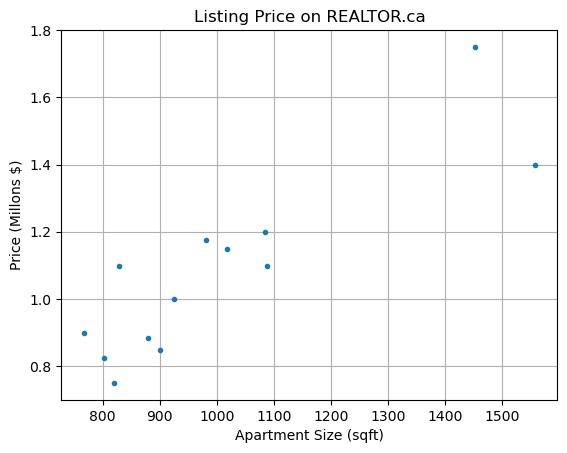

In [3]:
x = [1557,1452,767,900,1018,802,924,981,879,819,829,1088,1085]
y = [1.398,1.750,0.899,0.848,1.149,0.825,0.999888,1.175,0.885,0.749888,1.098,1.099,1.198]
plt.plot(x,y,'.')
plt.title('Listing Price on REALTOR.ca')
plt.xlabel('Apartment Size (sqft)'), plt.ylabel('Price (Millons $)'), plt.grid(True)
plt.show()

Choose a simple linear regression model for the data $y = \beta_0 + \beta_1 x + \varepsilon$. Construct the matrix $X$:

In [4]:
X = np.column_stack([np.ones(len(x)),x])
X

array([[1.000e+00, 1.557e+03],
       [1.000e+00, 1.452e+03],
       [1.000e+00, 7.670e+02],
       [1.000e+00, 9.000e+02],
       [1.000e+00, 1.018e+03],
       [1.000e+00, 8.020e+02],
       [1.000e+00, 9.240e+02],
       [1.000e+00, 9.810e+02],
       [1.000e+00, 8.790e+02],
       [1.000e+00, 8.190e+02],
       [1.000e+00, 8.290e+02],
       [1.000e+00, 1.088e+03],
       [1.000e+00, 1.085e+03]])

Solve the normal equations:

In [5]:
beta = la.solve(X.T@X,X.T@y)
beta

array([0.10620723, 0.00096886])

Plot the linear regression model with the data:

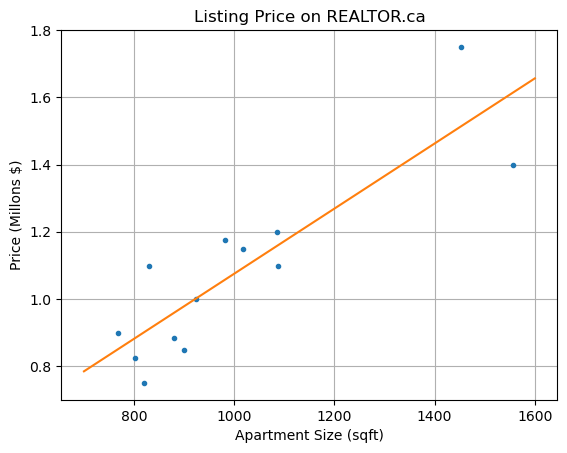

In [6]:
xs = np.linspace(700,1600)
ys = beta[0] + beta[1]*xs
plt.plot(x,y,'.',xs,ys)
plt.title('Listing Price on REALTOR.ca'), plt.grid(True)
plt.xlabel('Apartment Size (sqft)'), plt.ylabel('Price (Millons $)')
plt.show()

The coefficient $\beta_1 = 0.00096886$ suggests that the listing price of a 2-bedroom apartment increases by $968.86$ dollars per square foot.

## Example: Temperature

The file `temperature.csv` includes daily average temperature measured at the Vancouver Airport from 1995 to 2023 (see [vancouver.weatherstats.ca](https://vancouver.weatherstats.ca)). Let’s import the data, look the first few rows and then plot the average tempearture versus day of the year.

In [7]:
df = pd.read_csv('temperature.csv')

In [8]:
df.head()

,day,month,year,dayofyear,avg_temperature
0,13,4,2023,103,7.10
1,12,4,2023,102,5.19
2,11,4,2023,101,8.00
3,10,4,2023,100,7.69
4,9,4,2023,99,9.30


In [9]:
df.tail()

,day,month,year,dayofyear,avg_temperature
9995,1,12,1995,335,6.40
9996,30,11,1995,334,9.15
9997,29,11,1995,333,11.50
9998,28,11,1995,332,9.75
9999,27,11,1995,331,6.90


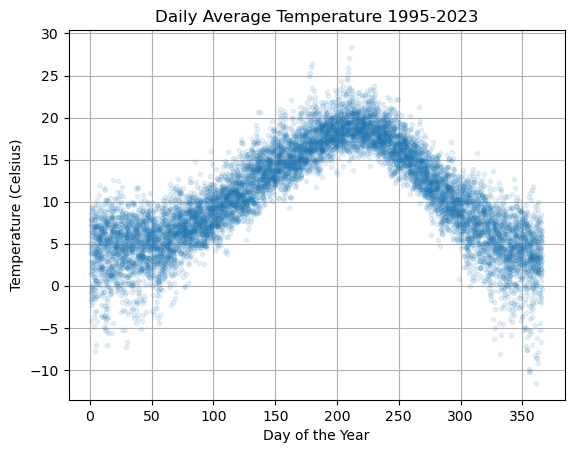

In [10]:
plt.plot(df['dayofyear'],df['avg_temperature'],'.',alpha=0.1,lw=0)
plt.title('Daily Average Temperature 1995-2023')
plt.xlabel('Day of the Year'), plt.ylabel('Temperature (Celsius)'), plt.grid(True)
plt.show()

Let $T$ by the temperature and let $d$ be the day of the year. Define a regression model of the form

$$
T = \beta_0 + \beta_1 \cos(2 \pi d/365) + \beta_2 \sin(2 \pi d/365)
$$

Note that if we rewrite the variables as $y = T$, $x_1 = \cos(2 \pi d/365)$ and $x_2 = \sin(2 \pi d/365)$ then we see that this is indeed a linear regression model

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

Construct the corresponding data matrix $X$ and compute the coefficient vector $\boldsymbol{\beta}$.

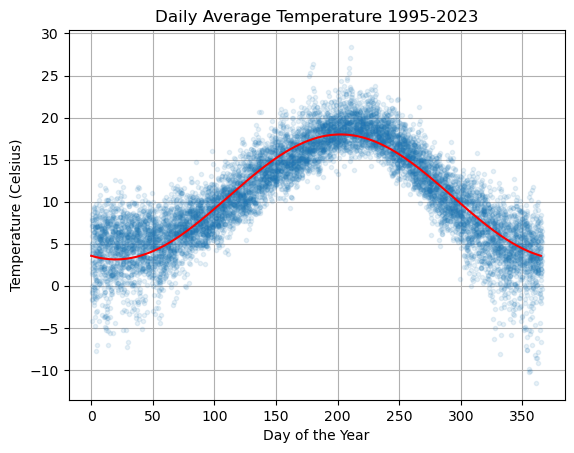

In [11]:
N = len(df)
d = df['dayofyear']
T = df['avg_temperature']
X = np.column_stack([np.ones(N),np.cos(2*np.pi*d/365),np.sin(2*np.pi*d/365)])
beta = la.solve(X.T@X,X.T@T)

ds = np.linspace(0,365,500)
Ts = beta[0] + beta[1]*np.cos(2*np.pi*ds/365) + beta[2]*np.sin(2*np.pi*ds/365)

plt.plot(df['dayofyear'],df['avg_temperature'],'.',alpha=0.1,lw=0)
plt.plot(ds,Ts,'r'), plt.grid(True)

plt.title('Daily Average Temperature 1995-2023')
plt.xlabel('Day of the Year'), plt.ylabel('Temperature (Celsius)')
plt.show()